<a href="https://colab.research.google.com/github/quicksilverri/machile-learning-notes/blob/main/sklearn_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Beginings

In [ ]:
# %pip install --upgrade scikit-learn==0.23.1

In [ ]:
from sklearn.datasets import load_boston 
import pandas as pd

In [ ]:
X, y = load_boston(return_X_y=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
kn_m = KNeighborsRegressor()

In [ ]:
lr_m = LinearRegression()

In [ ]:
kn_m.fit(X, y)

KNeighborsRegressor()

In [ ]:
lr_m.fit(X, y)

LinearRegression()

In [ ]:
import matplotlib.pylab as plt

In [ ]:
pred = kn_m.predict(X)

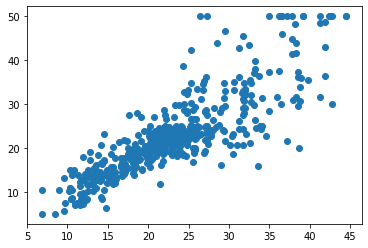

In [ ]:
plt.scatter(pred, y)

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

In [ ]:
mod = KNeighborsRegressor().fit(X, y)

pipe = Pipeline([
    ('scale', StandardScaler()), 
    ('model', KNeighborsRegressor())
])

In [ ]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [ ]:
pred = pipe.predict(X)

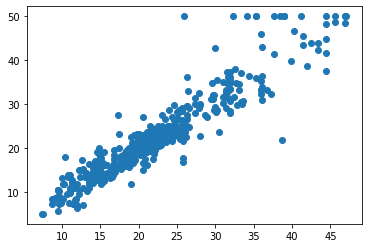

In [ ]:
plt.scatter(pred, y)

In [ ]:
lr_pipe = Pipeline([
                    ('scale', StandardScaler()), 
                    ('model', LinearRegression())
])

In [ ]:
lr_pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [ ]:
pred_lr = lr_pipe.predict(X)

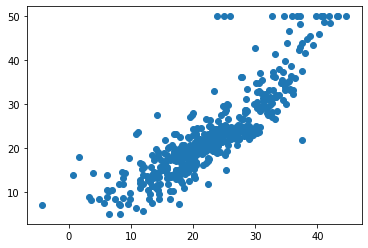

In [ ]:
plt.scatter(pred_lr, y)

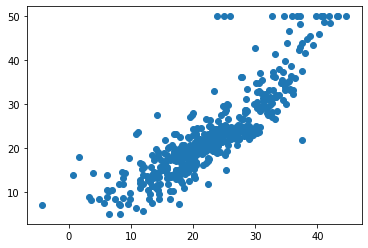

In [ ]:
lr = LinearRegression()
lr.fit(X, y)
pred_lr = lr.predict(X)
plt.scatter(pred_lr, y)

scaling doesnt really effects LR

# So this is a nice pattern: 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X, y = load_boston(return_X_y=True)

pipe = Pipeline([
                 ('scale', StandardScaler()), 
                 ('model', KNeighborsRegressor())
])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# pipe.get_params()

In [ ]:
mod = GridSearchCV(estimator=pipe, 
             param_grid={
                 'model__n_neighbors': range(1, 11)
             }, 
             cv=3)

In [ ]:
mod.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': range(1, 11)})

In [ ]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001664,0.000606,0.001740,0.000162,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001275,0.000086,0.001823,0.000103,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001269,0.000020,0.001734,0.000133,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001362,0.000101,0.002138,0.000416,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001268,0.000021,0.001818,0.000076,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.001227,0.000036,0.001831,0.000105,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001245,0.000049,0.001951,0.000090,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001215,0.000056,0.001956,0.000209,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001220,0.000059,0.002017,0.000121,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.001256,0.000032,0.002079,0.000238,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


# Looking at the dataset is CRUCIAL LMAO LOOK AT THE DATA

In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

In [ ]:
std_scaler = StandardScaler()
X_new = std_scaler.fit_transform(X)

In [ ]:
X = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
X_new = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)

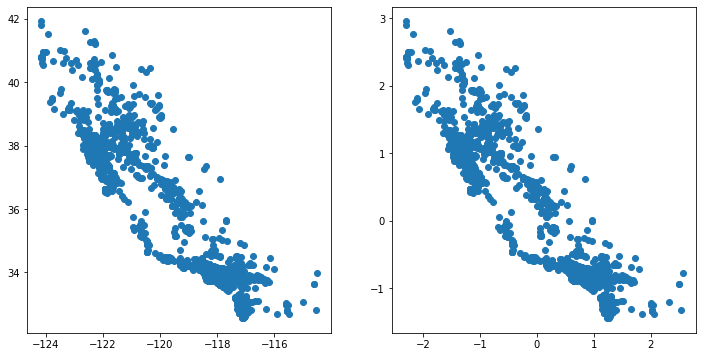

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12, 6))

axis[0].scatter(X.longitude, X.latitude)
axis[1].scatter(X_new.longitude, X_new.latitude)

In [ ]:
q_scaler = QuantileTransformer()
X_quant = pd.DataFrame(q_scaler.fit_transform(X), columns=X.columns)

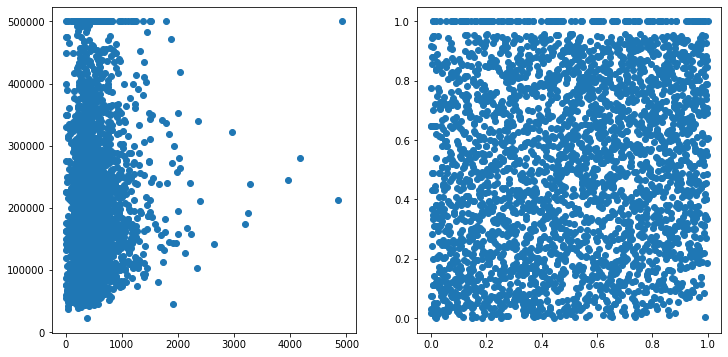

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12, 6))

axis[0].scatter(X.households, X.median_house_value)
axis[1].scatter(X_quant.households, X_quant.median_house_value)

Everything that has something to do with mean and std **is sensetive** to outliers.  
At the same time median and quantiles **does not care** about ouliers. 

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koaning/calm-notebooks/master/scikit-prep/drawndata2.csv')
X = df[['x', 'y']]
y = df['z']

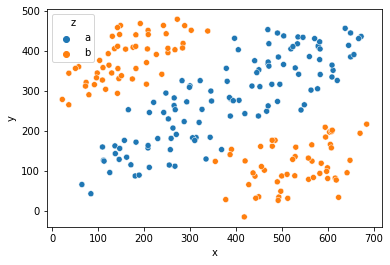

In [ ]:
sns.scatterplot(data=df, x='x', y='y', hue='z')

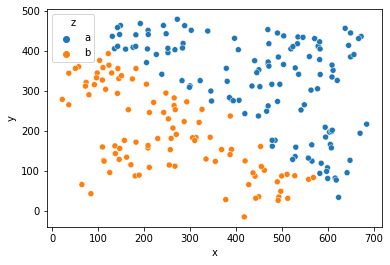

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
                 ('scale', QuantileTransformer(n_quantiles=100)), 
                 ('model', LogisticRegression())
])

pred = pd.DataFrame(pipe.fit(X, y).predict(X), columns=['z'])
sns.scatterplot(x=X.x, y=X.y, hue=pred.z)

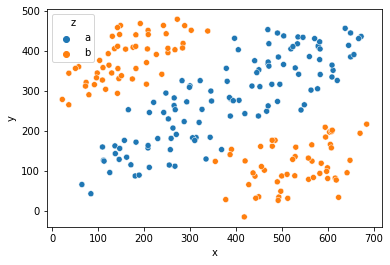

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
                 ('scale', PolynomialFeatures()), 
                 ('model', LogisticRegression())
])

pred = pd.DataFrame(pipe.fit(X, y).predict(X), columns=['z'])
sns.scatterplot(x=X.x, y=X.y, hue=pred.z)

# How to deal with categorical data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
arr = pd.DataFrame(['low', 'low', 'high', 'medium'])

In [ ]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

This is what you can pass to sklearn as numeric data 

In [ ]:
enc.transform([['lmao'], ['kek']])

array([[0., 0., 0.],
       [0., 0., 0.]])

## Try myself

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/quicksilverri/machile-learning-notes/main/data.csv')
X = df[['x', 'y']]
y = df['z']

In [ ]:
df

,x,y,z
0,471.072417,420.516180,b
1,390.672568,459.336100,b
2,421.723665,457.596130,b
3,370.943961,454.918368,b
4,366.544656,433.542907,b
...,...,...,...
391,424.756483,177.959952,c
392,377.969532,188.927478,c
393,448.139272,175.421944,c
394,497.743756,118.762023,c


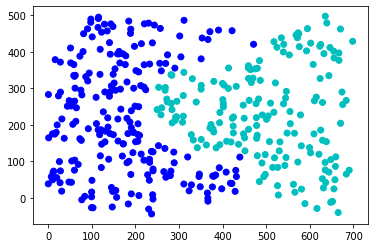

In [ ]:
model = LogisticRegression()

model.fit(X, y)

plt.scatter(x=df.x, y=df.y, c=df.z)

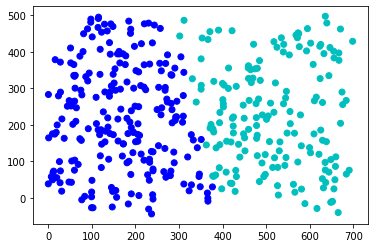

In [ ]:
pred = model.predict(X)
plt.scatter(x=X.x, y=X.y, c=pred)

In [ ]:
pipe = Pipeline([
                 ('scale', PolynomialFeatures()), 
                 ('model', LogisticRegression())
])
pipe.fit(X, y)
pipe_pred = pipe.predict(X)

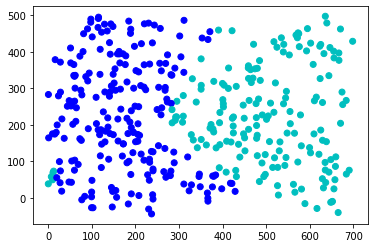

In [ ]:
plt.scatter(x=X.x, y=X.y, c=pipe_pred)

# How to choose a good model 

## importing staff

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/quicksilverri/machile-learning-notes/main/creditcard40000.csv', index_col=0)

In [ ]:
X = df.drop(columns=['Time', 'Amount', 'Class'])
y = df['Class']

f'Shapes of X={X.shape}, y={y.shape}, #Fraud casees={y.sum()}'

'Shapes of X=(40000, 28), y=(40000,), #Fraud casees=104.0'

this is very unbalanced dataset because there are WAY more non-fraud cases.

In [ ]:
pd.DataFrame(X)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-1.051131,0.606656,0.441297,0.590587,-0.118730,1.010767,2.282192,-0.751310,0.141134,0.661042,...,0.483128,-0.276647,-0.168207,0.495169,-0.066540,-0.904026,-0.149187,-0.302797,-0.188726,-0.248812
39996,1.188332,0.360587,-0.024267,1.179898,-0.095200,-0.975171,0.403633,-0.160097,-0.460291,0.294386,...,-0.091671,-0.190804,0.063470,0.115945,-0.129453,0.527456,0.748484,-0.308659,-0.022350,0.003130
39997,1.038810,-2.090833,0.852849,-0.847290,-2.112321,0.291188,-1.321491,0.007713,-0.771225,1.005279,...,0.306326,0.165469,-0.059743,0.138289,-0.341212,-0.045303,0.516037,0.016258,0.051843,0.061811
39998,1.211027,0.614544,-0.459212,0.900736,0.135725,-1.175774,0.337603,-0.198540,-0.188104,-0.756229,...,-0.847260,-0.114746,-0.105254,-0.214124,-0.013156,0.287419,0.453268,0.378507,-0.013994,0.042698


In [ ]:
mod = LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 3})
mod.fit(X, y)

LogisticRegression(class_weight={0: 1, 1: 3}, max_iter=1000)

In [ ]:
mod.predict(X).sum()

112.0

## Let's try grids

In [ ]:
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000), 
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1, 10)]}, 
    cv=4, 
    n_jobs=-1
)

grid.fit(X, y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}]})

In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.266677,0.358653,0.012177,0.004271,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.9983,0.9965,0.9978,0.9982,0.997700,0.000718,9
1,1.148172,0.364396,0.010165,0.009231,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.9983,0.9965,0.9985,0.9981,0.997850,0.000792,8
2,1.407975,0.458791,0.012147,0.007984,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.9983,0.9965,0.9992,0.9982,0.998050,0.000976,7
3,1.536451,0.423929,0.009798,0.008324,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.9982,0.9962,0.9995,0.9984,0.998075,0.001190,6
4,1.380553,0.383539,0.008439,0.003507,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.9984,0.9962,0.9995,0.9986,0.998175,0.001213,4
5,1.486385,0.317377,0.005112,0.000437,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.9985,0.9962,0.9995,0.9986,0.998200,0.001219,2
6,1.258685,0.325674,0.013192,0.005982,"{0: 1, 1: 7}","{'class_weight': {0: 1, 1: 7}}",0.9986,0.9962,0.9995,0.9988,0.998275,0.001244,1
7,1.489776,0.360583,0.017608,0.009860,"{0: 1, 1: 8}","{'class_weight': {0: 1, 1: 8}}",0.9987,0.9960,0.9993,0.9988,0.998200,0.001290,3
8,1.507039,0.329001,0.005071,0.000071,"{0: 1, 1: 9}","{'class_weight': {0: 1, 1: 9}}",0.9986,0.9959,0.9993,0.9989,0.998175,0.001337,5


In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y, grid.predict(X))

0.7016129032258065

In [ ]:
recall_score(y, grid.predict(X))

0.8365384615384616

## A lot of fitting

### Without sample_weight

i forget to save so i copypasted something from video

so we have different metrics - such as precision_score and recall_score  
we can also make custom ones 

sometimes metrics need make_scorer to act normal but we can overwrite custom score metrics so they don't have to be put into make_scorer.  
default metric works with (y_true, y_pred) and custon anti-make_scorer one needs (est, X, y_true, sample_weight)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer
import numpy as np

def min_recall_precision(est, X, y_true, sample_weight=None):  
  # this one is "advanced" metric - we don't need make_scorer for it
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid_old = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'min_both': min_recall_precision},
    refit='min_both',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
grid_old.fit(X, y);

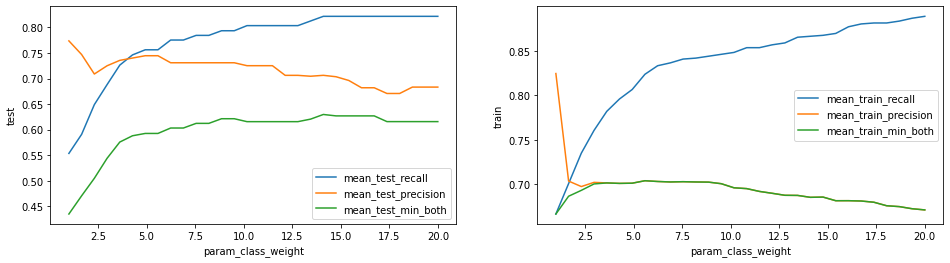

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(16, 4))
df_results = pd.DataFrame(grid_old.cv_results_)

for score in ['mean_test_recall', 'mean_test_precision', 
              'mean_test_min_both']:
    axis[0].plot([_[1] for _ in df_results['param_class_weight']],
                df_results[score],
                label=score)

for score in ['mean_train_recall', 'mean_train_precision', 
              'mean_train_min_both']:
    axis[1].plot([_[1] for _ in df_results['param_class_weight']],
                df_results[score],
                label=score)

axis[0].set_xlabel('param_class_weight')
axis[1].set_xlabel('param_class_weight')
axis[0].set_ylabel('test')
axis[1].set_ylabel('train')

axis[0].legend()
axis[1].legend()

### With sample_weight

In [ ]:
def min_recall_precision(est, X, y_true, sample_weight=None):  
  # this one is "advanced" metric - we don't need make_scorer for it
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'min_both': min_recall_precision},
    refit='min_both',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
grid.fit(X, y, sample_weight=np.log(1 + df['Amount']))

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827

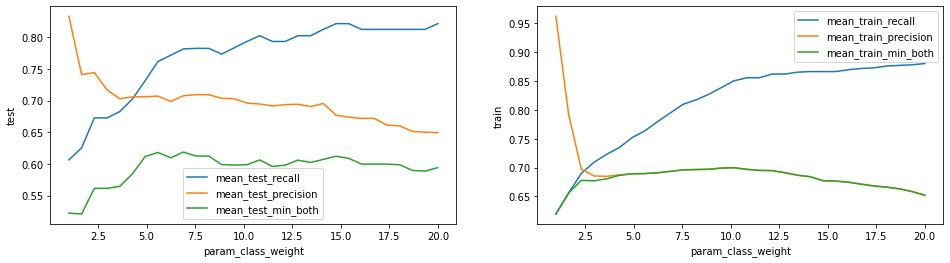

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(16, 4))
df_results = pd.DataFrame(grid.cv_results_)

for score in ['mean_test_recall', 'mean_test_precision', 
              'mean_test_min_both']:
    axis[0].plot([_[1] for _ in df_results['param_class_weight']],
                df_results[score],
                label=score)

for score in ['mean_train_recall', 'mean_train_precision', 
              'mean_train_min_both']:
    axis[1].plot([_[1] for _ in df_results['param_class_weight']],
                df_results[score],
                label=score)
    
axis[0].set_xlabel('param_class_weight')
axis[1].set_xlabel('param_class_weight')
axis[0].set_ylabel('test')
axis[1].set_ylabel('train')

axis[0].legend()
axis[1].legend()

### Treating fraud as outliers

In [ ]:
from collections import Counter
from sklearn.ensemble import IsolationForest
mod = IsolationForest().fit(X)
Counter(np.where(mod.predict(X) == -1, 1, 0))

Counter({0: 38657, 1: 1343})

because IsolationForest outputs 1 and -1, metrics would break (they expect values 1 and 0) so we have to write our own metrics. 

In [ ]:
from sklearn.model_selection import GridSearchCV

def outlier_precision(mod, X, y): 
  preds = mod.predict(X)
  return precision_score(y, np.where(preds == -1, 1, 0))

def outlier_recall(mod, X, y): 
  preds = mod.predict(X)
  return recall_score(y, np.where(preds == -1, 1, 0))

outlier_grid = GridSearchCV(
    estimator=IsolationForest(),
    param_grid={'contamination': np.linspace(0.001, 0.02, 10)},  # what is this?
    scoring={'precision': outlier_precision,
            'recall': outlier_recall},
    refit='precision',
    return_train_score=True,
    cv=5,
    n_jobs=-1
)

outlier_grid.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


GridSearchCV(cv=5, estimator=IsolationForest(), n_jobs=-1,
             param_grid={'contamination': array([0.001     , 0.00311111, 0.00522222, 0.00733333, 0.00944444,
       0.01155556, 0.01366667, 0.01577778, 0.01788889, 0.02      ])},
             refit='precision', return_train_score=True,
             scoring={'precision': <function outlier_precision at 0x7efc11268290>,
                      'recall': <function outlier_recall at 0x7efc1127c440>})

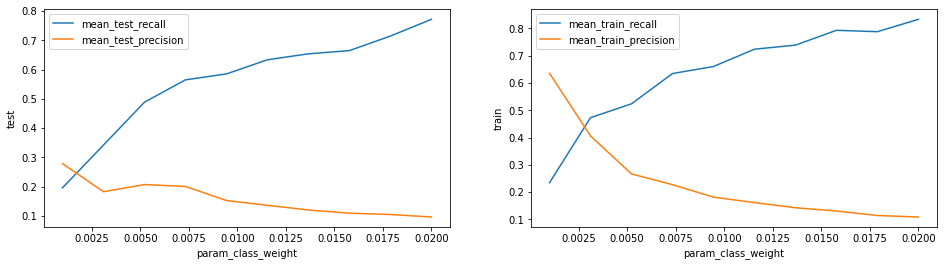

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(16, 4))
df_results = pd.DataFrame(outlier_grid.cv_results_)

for score in ['mean_test_recall', 'mean_test_precision', ]:
    axis[0].plot(df_results['param_contamination'],
                df_results[score],
                label=score)

for score in ['mean_train_recall', 'mean_train_precision']:
    axis[1].plot(df_results['param_contamination'],
                df_results[score],
                label=score)
    
axis[0].set_xlabel('param_class_weight')
axis[1].set_xlabel('param_class_weight')
axis[0].set_ylabel('test')
axis[1].set_ylabel('train')

axis[0].legend()
axis[1].legend()

**AND IT SUCKS**

# Meta Estimators 

Post-processing staff

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

%matplotlib inline

In [55]:
def make_plots(clf1, clf2, voting):
    X_new = np.concatenate([
        np.random.uniform(np.min(X[:, 0]), np.max(X[:, 0]), (20000, 1)),
        np.random.uniform(np.min(X[:, 1]), np.max(X[:, 1]), (20000, 1))
    ], axis=1)
    plt.figure(figsize=(16, 4))
    plt.subplot(141)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
    plt.title("original data")
    plt.subplot(142)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf1.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens1")
    plt.subplot(143)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf2.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens2")
    plt.subplot(144)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=voting.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens3");

In [53]:
# lets try Voting Classifier that sums up works of different classifiers

def VotingClassifier_for_tryhards(X, y):

  clf1 = LogisticRegression().fit(X, y)
  clf2 = KNeighborsClassifier().fit(X, y)

  voting = VotingClassifier(estimators=[('LogReg', clf1), ('KNN', clf2)], 
                            voting='soft', 
                            weights=[0.5, 0.5])

  voting.fit(X, y)

  make_plots(clf1, clf2, voting)

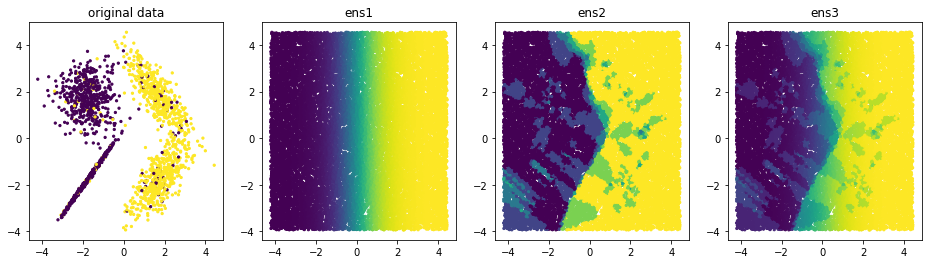

In [56]:
X, y = make_classification(n_samples=2000, n_features=2, 
                           n_redundant=0, random_state=13, 
                           class_sep=1.75, flip_y=0.1)

# plt.scatter(X[:, 0], X[:, 1], c=y, s=5)

VotingClassifier_for_tryhards(X, y)

In [30]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer

from sklego.meta import Thresholder 

In [ ]:
# !pip install sklego

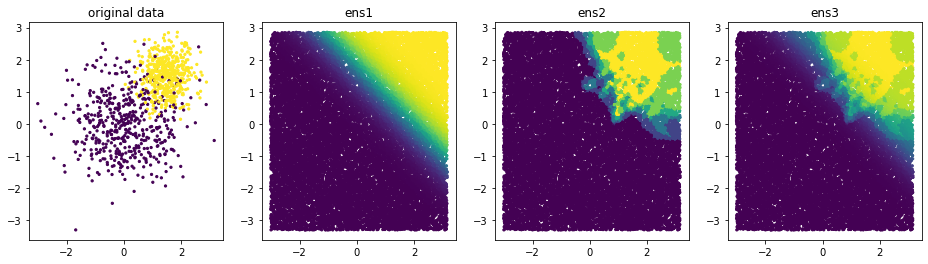

In [60]:
X, y = make_blobs(1000, centers=[(0, 0), (1.5, 1.5)], cluster_std=[1, 0.5])
# plt.scatter(X[:, 0], X[:, 1], c=y, s=6)

VotingClassifier_for_tryhards(X, y)

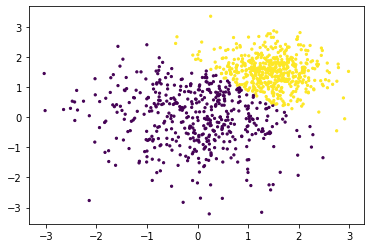

In [46]:
m = LogisticRegression().fit(X, y)
preds = m.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=preds, s=5)

# this one just made a line there so that's nothing interesting

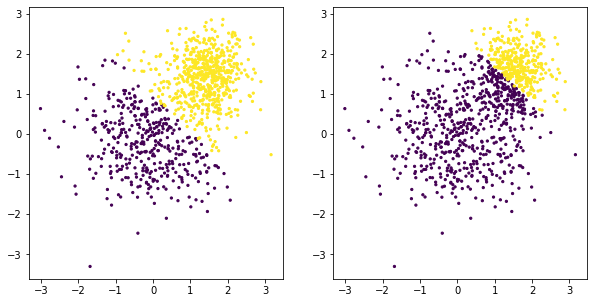

In [63]:
m1 = Thresholder(LogisticRegression(), threshold=0.1).fit(X, y)
m2 = Thresholder(LogisticRegression(), threshold=0.9).fit(X, y)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(X[:, 0], X[:, 1], c=m1.predict(X), s=5)
axes[1].scatter(X[:, 0], X[:, 1], c=m2.predict(X), s=5)